# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [146]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [147]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_validate

# Instantiate Decision Tree model with max_depth
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=0)

# Instantiate Random Forest model with max_depth
random_forest_model = RandomForestRegressor(max_depth=5, random_state=0)

# Instantiate Gradient Boosting model with max_depth
gradient_boosting_model = GradientBoostingRegressor(max_depth=5, random_state=0)

# Fit the models to the data
decision_tree_model.fit(X,y)
random_forest_model.fit(X,y)
gradient_boosting_model.fit(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

results_list = []
    
for model in [decision_tree_model, random_forest_model,  gradient_boosting_model]:

    scores = cross_validate(model, X_train, y_train, cv=5, 
                        scoring='neg_mean_squared_error',
                       return_train_score=True)
    
    
    train_sc = -scores['train_score'].mean()
    val_sc = -scores['test_score'].mean()

    results_list.append([train_sc, val_sc])
                    
results = pd.DataFrame(results_list, columns=['Training accuracy', 'Validation accuracy'], index = ['DT', 'RF', 'GB'])
print(results)    

# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

    Training accuracy  Validation accuracy
DT          49.862596            79.490160
RF          31.540857            50.082127
GB           3.657019            22.141648


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [148]:
# TO DO: ADD YOUR CODE HERE
results_list = []
    
for model in [decision_tree_model, random_forest_model,  gradient_boosting_model]:

    scores = cross_validate(model, X_train, y_train, cv=5, 
                        scoring='r2',
                       return_train_score=True)
    
    
    train_sc = scores['train_score'].mean()
    val_sc = scores['test_score'].mean()

    results_list.append([train_sc, val_sc])
                    
results = pd.DataFrame(results_list, columns=['Training accuracy', 'Validation accuracy'], index = ['DT', 'RF', 'GB'])
print(results)  

    Training accuracy  Validation accuracy
DT           0.821295             0.710786
RF           0.886982             0.819498
GB           0.986913             0.919990


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*
1. These results seem better than the results using a linear model in the previous assignment. The mse values for both training and validation data sets were 110 and 96 for the linear model and the mse values for both training and validation accuracy for the three models were all significantly lower at 50 and 79 for the DT model, 32 and 50 for the RF model and 4 and 22 for the GB model. The r2 values for both training and validation data sets were 0.61 and 0.64 for the linear model and the r2 values for both training and validation accuracy for the three models were all significantly higher at 0.82 and 0.71 for the DT model, 0.89 and 0.82 for the RF model and 0.99 and 0.92 for the GB model.

2. I would select the GB model as it had the highest r2 and lowest mse values for both training and validation accuracy.

3. To increase the accuracy of tree-based models, which have a tendency to overfit, I would pre prune further by reducing the max_depth to 4 and I would do some post pruning and remove nodes that contain little to no information.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

I sourced my code from my previous assignment and the Decision Trees Example.ipynb. I completed the assignment in the steps listed. I didn't really have many challenges as the previous assignment and the Decision Trees Example covered the code and the lecture notes had all the information needed to answer the questions.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [149]:
# TO DO: Import wine dataset

df = pd.read_csv('wine.data', 
                 names = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                          'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                          'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
df

features = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
            'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
            'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = df.loc[:, features]

y = df['class']

print(f"X size={X.shape}; type={type(X)}")
print(f"y size={y.shape}; type={type(y)}")

X size=(178, 13); type=<class 'pandas.core.frame.DataFrame'>
y size=(178,); type=<class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [150]:
# TO DO: ADD YOUR CODE HERE
print(df.head())

   class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [151]:
# TO DO: ADD YOUR CODE HERE
print(X.isnull().sum())
print(y.isnull().sum())

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64
0


How many samples do we have of each type of wine?

In [152]:
# TO DO: ADD YOUR CODE HERE, Assuming type is class
print(df.groupby('class').size())

class
1    59
2    71
3    48
dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [153]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate

dtc_model = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc_model.fit(X,y)

svc_model = SVC()
svc_model.fit(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

results_list = []
    
for model in [dtc_model, svc_model]:

    scores = cross_validate(model, X_train, y_train, cv=5, 
                        scoring='accuracy',
                       return_train_score=True)
    
    
    train_sc = scores['train_score'].mean()
    val_sc = scores['test_score'].mean()

    results_list.append([X.shape,train_sc, val_sc])
                    
results = pd.DataFrame(results_list, columns=['Data size', 'Training accuracy', 'Validation accuracy'], index = ['DTC', 'SVC'])
print(results)  

# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

     Data size  Training accuracy  Validation accuracy
DTC  (178, 13)           0.993750              0.91875
SVC  (178, 13)           0.682813              0.66250


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [154]:
# TO DO: Implement best model
dtc_model

DecisionTreeClassifier(max_depth=3, random_state=0)

Text(170.97222222222223, 0.5, 'true value')

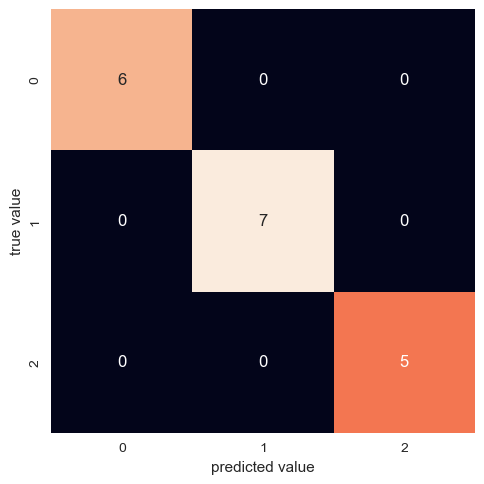

In [155]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, dtc_model.predict(X_test))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [156]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_model.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*
1. The training and validation accuracy was higher using the decision tree classifier than the svc model. The decision tree classifier yielded training and validation accuracies of 0.99 and 0.92, whereas the svc model yielded yielded training and validation accuracies of 0.68 and 0.66.

2. The support vector machine model could have not worked as well because the data might not have been easily linearly seperable and also becuase SVMs are very sensitive to feature ranges and we didn't scale them.

3. None

4. Both are equally as important as the consequences of a false positive and false negative are the same (the guessed location of the wine is wrong).

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?



*DESCRIBE YOUR PROCESS HERE*
I sourced my code using part 1, Regression Metrics-filled.ipynb and Decision Trees Example.ipynb. I completed the steps in the order they were listed. I used generative AI to clear up some concepts such as precision and recall, I mostly used the lecture slides including classification uncertainity and did not modify my code. The biggest challenges I had were: understanding data size for part 2 step 5.1 and understanding a confusion matrix that is 3x3. I'm not sure if I overcame the above challenges or not.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*
1. Pre pruning decision tree models helps to decrease overfitting.
2. Support vector machine models require careful preprocessing of data and tuning of parameters to be accurate as mentioned in the SVM slides.
3. Ensemble of decision trees tend to work better than single decision trees.


## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*
I liked how the assignment was broken down into smaller steps. I found the confusion matrix portion quite confusing as there were three types of classification so I didn't understand what a false positive and false negative were really well.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [1]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*